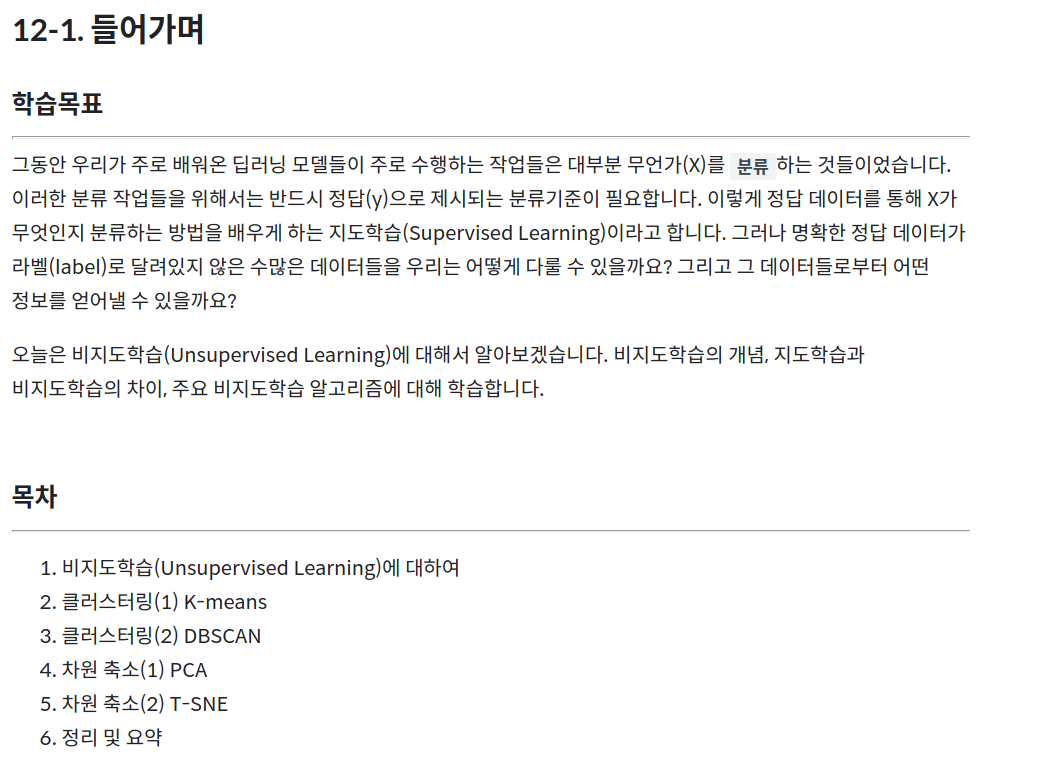

## 12-2.비지도 학습에 대하여 

비지도학습이란? 
    * 정답 label이 없는 것. 
    * 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법.
    * 대표적인 방법이 clustering, 차원축소, 데이터 시각화, generative model
    
                

## 12-3 클러스터링 (1)  K-means

+ 군집화란 명확한 기준이 없는 상황에서도 데이터들을 분석하여 가까운 것들끼리 묶어 주는 작업입니다. 
+ 기준이 없어도 k개의 그룹으로 뭉쳐보라고 지정합니다. 아무렇게나가 아니라 k개의 기준점을 중심으로! 
+ k-means 알고리즘은 k값이 주어져 있을 때, 주어진 데이터들을 k개의 클러스터로 묶는 알고리즘


In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

In [5]:
points, labels = make_blobs(centers=5,random_state =135)
print(points.shape,points[:10])
print(labels.shape,labels[:10])
#좌표가 points x,y이렇게 인거죠? 

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


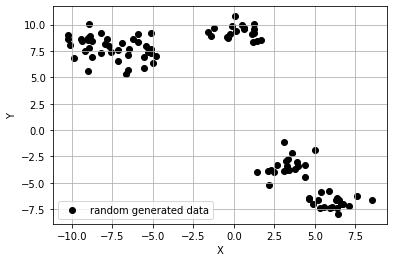

In [14]:
fig = plt.figure() #그림그릴게요
ax = fig.add_subplot(1,1,1) #그림 모양이렇게 해주세요.

points_df = pd.DataFrame(points,columns=['X','Y']) #포인트 데이터를 넣어주는데 칼럼을 x,y로 넣어주세요. 
display(points_df.head())

ax.scatter(points[:,0],points[:,1],c = 'black',label='random generated data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()


### 생생한 데이터에 K-means 알고리즘 적용 

유클리디언 거리, L2 distance: 두 점 사이의 직선의 거리 

1. 원하는 클러스터의 수 결정 
2. 무작위로 클러스터의 수와 같은 k개의 중심점을 선정 각각의 클러스터를 대표합니다. 
3. 나머지 점들과 모든 중심점 간의 유클리디언 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다. 
4. 각 k개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 다음 되풀이의 중심점이 됩니다. 
5. 재조정된 중심점ㅇ르 바탕으로 모든 점들과 새로 조정된 중심점 간의 거리를 다시 계산하고, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다. 
6. 4번과 5번을 반복 수행 합니다. 반복횟수는 사용자가 조절하고, 몇 번의 과정을 거치면 수렴이 되서 중심점이 바뀌지 않습니다. 


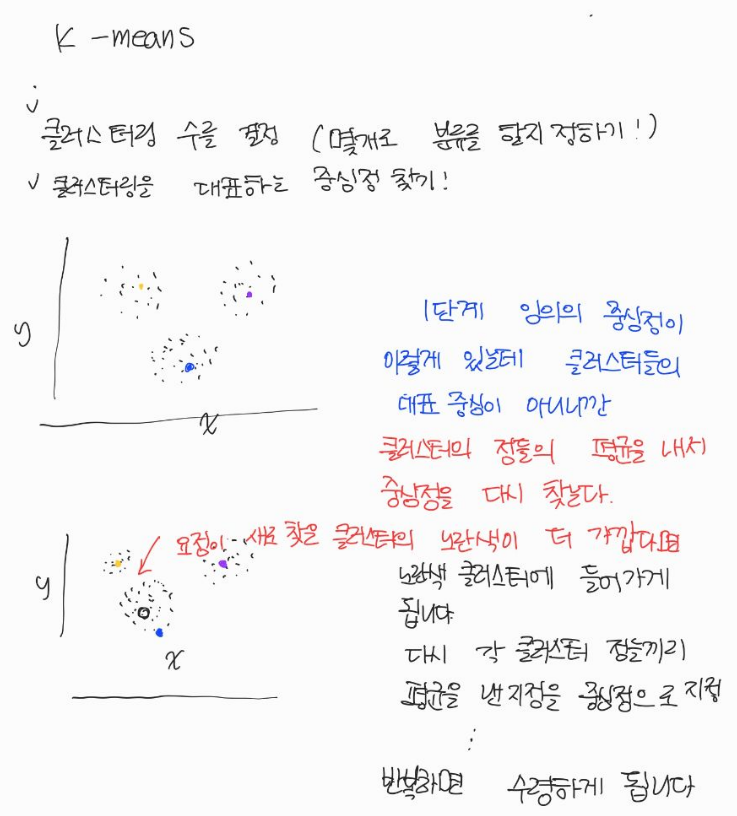

In [16]:
from sklearn.cluster import KMeans

kmeans_cluster = KMeans(n_clusters =5) #kmeans모델을 클러스터라는 변수로 받는데 클러스터 수는 5개로 지정하라는 옵션 설정 

kmeans_cluster.fit(points)  #중심점을 잡고, 중심점과 요소들의 거리를 측정해서 5개로 분류. 요소들끼리 평균을 다시 내서 중심점 재조정 그리고 요소들 다시 뿌리기를 반복

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


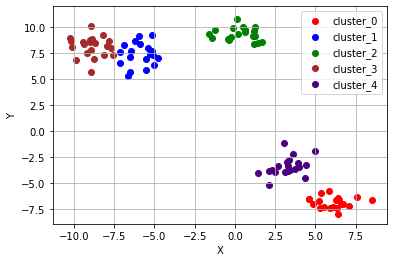

In [22]:
color_dict = {0:'red',1:'blue',2:'green',3:'brown',4:'indigo'}

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_==cluster]
    ax.scatter(cluster_sub_points[:,0],cluster_sub_points[:,1],c=color_dict[cluster],label='cluster_{}'.format(cluster))

ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.legend()
ax.grid()

In [ ]:
##3. k-means 알고리즘이 잘 동작하지 않는 예시 

1. 군집의 갯수를 미리 지정해야 하기 떄문에 이를 알거나 예측하기 어려운 경우.
2. 유클리디언 거리를 기반으로 측정하기 때문에 거리측정을 기반으로 하지 않는다면 어려움. 

ex) 달모양, 원형, 

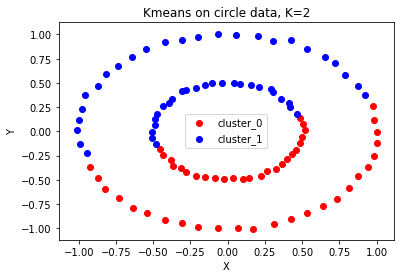

In [27]:

from sklearn.datasets import make_circles

circle_points, circle_labels = make_circles(factor=0.5,noise=0.01)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
corlor_dict = {0:'red',1:'green'}

for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:,0],cluster_sub_points[:,1],c=color_dict[cluster],label = 'cluster_{}'.format(cluster))
    ax.set_title('Kmeans on circle data, K=2')
    ax.legend()
    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')